In [15]:
#本文件用于生成二阶的GMM，组成LMM

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
n=500
C=2#三个亚组
weight=[0.3,0.7]
mean=[-2,2]
covs=[1,1]#标准差
Theta=np.array([weight,mean,covs])
Theta#混合高斯分布的参数，mean越靠近且离散程度越大，区分的难度越大
p1=int(n*weight[0])
p2=int(n*weight[1])

In [26]:
np.random.seed(123)
mu=np.array([0,0])
cov=np.array([[2,0.5],[0.5,2]])
x=np.random.multivariate_normal(mu,cov,n,check_valid='raise')
beta=np.random.uniform(0,1,2)
beta

array([0.74220923, 0.18045347])

In [19]:
np.random.seed(123)
aa=np.random.normal(mean[0],covs[0],p1)
bb=np.random.normal(mean[1],covs[1],p2)
gamma=np.zeros((n,2))#随机效应的具体取值，第二列为所属亚组
gamma[:,0]=np.hstack((aa,bb))
gamma[:p1,1]=0
gamma[-p2:,1]=1

In [20]:
y=np.zeros((n,2))
for i in range(n):
        y[i,0]=np.dot(x[i],beta)+gamma[i,0]
        y[i,1]=gamma[i,1]

In [21]:
def normal(x,theta):#一元的正态分布密度函数
    mu=theta[0]
    s=theta[1]#标准差
    result = (1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)**2/(2*s**2))
    return result

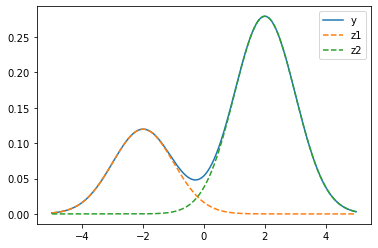

In [22]:
xnum = np.linspace(-5,5,2000) # 从-5到5，等分2000分
high = weight[0]*normal(xnum,Theta[1:,0])+weight[1]*normal(xnum,Theta[1:,1])
z1 = weight[0]*normal(xnum,Theta[1:,0])
z2 = weight[1]*normal(xnum,Theta[1:,1])
plt.figure() # 定义一个图像窗口
plt.plot(xnum,high) # 绘制曲线 y
plt.plot(xnum,z1,linestyle='--')
plt.plot(xnum,z2,linestyle='--')
plt.legend(['y','z1','z2'])
plt.show()

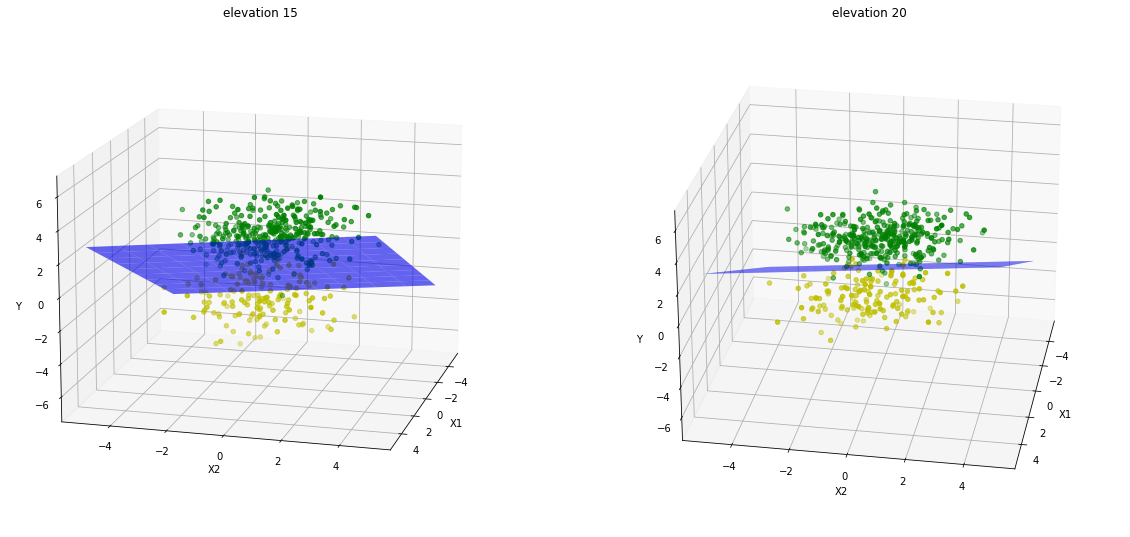

In [24]:
fig = plt.figure(figsize=(20,10))

xm = np.linspace(-5, 5,10)
ym = np.linspace(-5, 5,10)
X, Y = np.meshgrid(xm, ym)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X,Y,Z=beta[0]*X+beta[1]*Y, color='b',alpha=0.6)
ax1.scatter(x[:p1,0],x[:p1,1], y[:p1,0], c='y')  # 绘制数据点
ax1.scatter(x[-p2:,0],x[-p2:,1], y[-p2:,0], c='g')
ax1.set_zlabel('Y')  # 坐标轴
ax1.set_ylabel('X2')
ax1.set_xlabel('X1')
ax1.view_init(elev=15,    # 仰角
            azim=15)   # 方位角
ax1.set_title('elevation 15')

ax2 = fig.add_subplot(122, projection='3d')  # 创建一个三维的绘图工程度
ax2.scatter(x[:p1,0],x[:p1,1], y[:p1,0], c='y')  # 绘制数据点
ax2.scatter(x[-p2:,0],x[-p2:,1], y[-p2:,0], c='g')
ax2.plot_surface(X,Y,Z=beta[0]*X+beta[1]*Y, color='b',alpha=0.6)
ax2.set_zlabel('Y')  # 坐标轴
ax2.set_ylabel('X2')
ax2.set_xlabel('X1')
ax2.view_init(elev=25,    # 仰角
            azim=10)   # 方位角
ax2.set_title('elevation 20')

plt.show()